In [3]:
words = open('names.txt', 'r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
min(len(w) for w in words)

2

In [5]:
max(len(w) for w in words)

15

In [6]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [7]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [4]:
# E01: Trigram
b = {}
for w in words:
  chs = ['<S>'] + ['<S>'] + list(w) + ['<E>']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    trigram = (ch1, ch2, ch3)
    b[trigram] = b.get(trigram, 0) + 1

In [5]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('<S>', '<S>', 'a'), 4410),
 (('<S>', '<S>', 'k'), 2963),
 (('<S>', '<S>', 'm'), 2538),
 (('<S>', '<S>', 'j'), 2422),
 (('<S>', '<S>', 's'), 2055),
 (('a', 'h', '<E>'), 1714),
 (('<S>', '<S>', 'd'), 1690),
 (('n', 'a', '<E>'), 1673),
 (('<S>', '<S>', 'r'), 1639),
 (('<S>', '<S>', 'l'), 1572),
 (('<S>', '<S>', 'c'), 1542),
 (('<S>', '<S>', 'e'), 1531),
 (('a', 'n', '<E>'), 1509),
 (('o', 'n', '<E>'), 1503),
 (('<S>', 'm', 'a'), 1453),
 (('<S>', '<S>', 't'), 1308),
 (('<S>', '<S>', 'b'), 1306),
 (('<S>', 'j', 'a'), 1255),
 (('<S>', 'k', 'a'), 1254),
 (('e', 'n', '<E>'), 1217),
 (('<S>', '<S>', 'n'), 1146),
 (('l', 'y', 'n'), 976),
 (('y', 'n', '<E>'), 953),
 (('a', 'r', 'i'), 950),
 (('<S>', '<S>', 'z'), 929),
 (('i', 'a', '<E>'), 903),
 (('<S>', '<S>', 'h'), 874),
 (('i', 'e', '<E>'), 858),
 (('a', 'n', 'n'), 825),
 (('e', 'l', 'l'), 822),
 (('a', 'n', 'a'), 804),
 (('i', 'a', 'n'), 790),
 (('m', 'a', 'r'), 776),
 (('i', 'n', '<E>'), 766),
 (('e', 'l', '<E>'), 727),
 (('y', 'a', '<E>'

In [6]:
import torch

In [7]:
N = torch.zeros((27, 27, 27), dtype=torch.int32)

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [8]:

for w in words:
  chs = ['.'] + ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    N[ix1, ix2, ix3] += 1

N = N.view(-1, N.shape[2])
    

In [9]:
import math

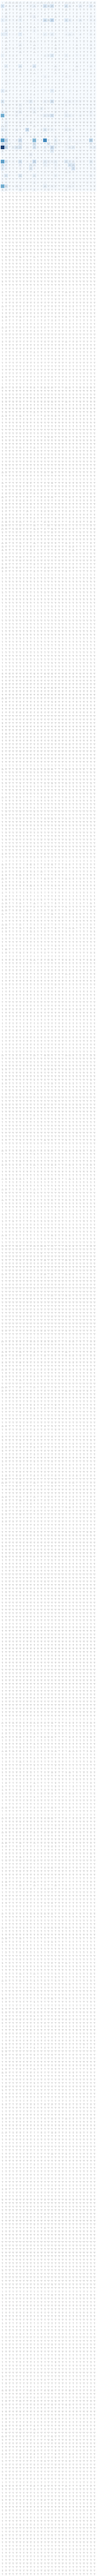

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16*16))
plt.imshow(N[27*4:27*6, :], cmap='Blues')
for i in range(27*27):
    for j in range(27):
        i1, i2 = divmod(i, 27)
        chstr = itos[i1] + itos[i2] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [15]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [16]:
# --------- !!! OPTIMIZATION !!! yay --------------

In [11]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [18]:
# --------- !!! OPTIMIZATION !!! yay, but this time actually --------------

In [12]:
import torch
import torch.nn.functional as F

In [13]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [14]:
# E02: Split dataset into train, dev and test
# create the dataset
xs1, xs2, xs, ys = [], [], [], []
for w in words:
  chs = ['.'] + ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    #print(ch1, ch2, ch3)
    xs1.append(ix1)
    xs2.append(ix2)
    ys.append(ix3)

xs1 = torch.tensor(xs1)
xs2 = torch.tensor(xs2)
xs = torch.stack((xs1, xs2), dim=1)
ys = torch.tensor(ys)
print('xs1.shape', xs1.size())
num = xs1.nelement()

train_size = int(num * 0.8)
dev_size = int(num * 0.1)
test_size = num - train_size - dev_size

shuffled_indices = torch.randperm(num) 
xs = xs[shuffled_indices]
ys = ys[shuffled_indices]

train_x = xs[: train_size]
dev_x = xs[train_size : train_size + dev_size]
test_x = xs[train_size + dev_size : ]

train_y = ys[: train_size]
dev_y = ys[train_size : train_size + dev_size]
test_y = ys[train_size + dev_size : ]

train_x.size()

xs1.shape torch.Size([228146])


torch.Size([182516, 2])

In [15]:
train_x[5]

tensor([ 9, 14])

In [16]:
print('number of examples: ', num)

#xs = xs.view(-1)
print('xs.shape:', xs.size())

number of examples:  228146
xs.shape: torch.Size([228146, 2])


In [68]:
mini_x = train_x[:2]
mini_x

tensor([[18,  9],
        [ 9, 19]])

In [ ]:
mini_x = F.one_hot(mini_x, num_classes=27*28)

In [17]:
# E03: Tune hyperparameters
# gradient descent
regs = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
lr_rates = [1e1, 5E1, 1e2]
g = torch.Generator().manual_seed(2147483647)
lowest_train_loss = 10.0
lowest_dev_loss = 10.0

for reg in regs:
  for lr in lr_rates:
    # initialize the 'network'
    W = torch.randn((54, 27), generator=g, requires_grad=True)
    for k in range(20):
      # forward pass
      xenc_train = F.one_hot(train_x, num_classes=27).float() # input to the network: one-hot encoding
      #print(f'xenc_train.shape: {xenc_train.size()}')
      xenc_train = xenc_train.view(len(train_x), -1)
      logits_train = xenc_train @ W # predict log-counts
      counts_train = logits_train.exp() # counts, equivalent to N
      probs_train = counts_train / counts_train.sum(1, keepdims=True) # probabilities for next character
      loss_train = -probs_train[torch.arange(len(train_x)), train_y].log().mean() + reg*(W**2).mean()
      #print(f'    reg={reg}, lr={lr}: loss_train={loss_train}')
      # backward pass
      W.grad = None # set to zero the gradient
      loss_train.backward()
      # update
      W.data += -lr * W.grad
    
    xenc_dev = F.one_hot(dev_x, num_classes=27).float() # input to the network: one-hot encoding
    xenc_dev = xenc_dev.view(len(dev_x), -1)
    logits_dev = xenc_dev @ W # predict log-counts
    counts_dev = logits_dev.exp() # counts, equivalent to N
    probs_dev = counts_dev / counts_dev.sum(1, keepdims=True) # probabilities for next character
    loss_dev = -probs_dev[torch.arange(len(dev_x)), dev_y].log().mean() + reg*(W**2).mean()

    if loss_train < lowest_train_loss:
      best_reg = reg
      best_lr = lr
      lowest_train_loss = loss_train
      lowest_dev_loss = loss_dev

    print(f'reg={reg}, lr={lr}: loss_train={loss_train}, loss_dev={loss_dev}')

print('Best model is:')
print(f'best_reg={best_reg}, best_lr={best_lr}: loss_train={lowest_train_loss}, loss_dev={lowest_dev_loss}')

reg=1e-07, lr=10.0: loss_train=2.879119873046875, loss_dev=2.875962972640991
reg=1e-07, lr=50.0: loss_train=2.5732545852661133, loss_dev=2.5198349952697754
reg=1e-07, lr=100.0: loss_train=3.5033931732177734, loss_dev=3.0697522163391113
reg=1e-06, lr=10.0: loss_train=2.9289352893829346, loss_dev=2.924708843231201
reg=1e-06, lr=50.0: loss_train=2.511181354522705, loss_dev=2.5426361560821533
reg=1e-06, lr=100.0: loss_train=2.7309792041778564, loss_dev=2.88919734954834
reg=1e-05, lr=10.0: loss_train=2.8631513118743896, loss_dev=2.8536245822906494
reg=1e-05, lr=50.0: loss_train=2.5154197216033936, loss_dev=2.5648162364959717
reg=1e-05, lr=100.0: loss_train=3.5677499771118164, loss_dev=3.0684666633605957
reg=0.0001, lr=10.0: loss_train=2.887237548828125, loss_dev=2.884594440460205
reg=0.0001, lr=50.0: loss_train=2.5720713138580322, loss_dev=2.5170915126800537
reg=0.0001, lr=100.0: loss_train=3.613720655441284, loss_dev=3.176886796951294
reg=0.001, lr=10.0: loss_train=2.920173168182373, loss_

In [18]:
print(f'best_reg={best_reg}, best_lr={best_lr}: loss_train={lowest_train_loss:.4f}, loss_dev={lowest_dev_loss:.4f}')

best_reg=0.001, best_lr=50.0: loss_train=2.5002, loss_dev=2.5162


In [25]:
# Obtain best model
W = torch.randn((54, 27), generator=g, requires_grad=True)
for k in range(20):
    # forward pass
    xenc_train = F.one_hot(train_x, num_classes=27).float() # input to the network: one-hot encoding
    #print(f'xenc_train.shape: {xenc_train.size()}')
    xenc_train = xenc_train.view(len(train_x), -1)
    logits_train = xenc_train @ W # predict log-counts
    counts_train = logits_train.exp() # counts, equivalent to N
    probs_train = counts_train / counts_train.sum(1, keepdims=True) # probabilities for next character
    loss_train = -probs_train[torch.arange(len(train_x)), train_y].log().mean() + best_reg*(W**2).mean()
    #print(f'    reg={reg}, lr={lr}: loss_train={loss_train}')
    # backward pass
    W.grad = None # set to zero the gradient
    loss_train.backward()
    # update
    W.data += -best_lr * W.grad

loss_dev is close to loss_train, but not much. Best model is obtained with regularization strength of 0.001, learning rate of 50. The lowest train loss obtain is 2.5002 with a validation loss of 2.5162.

In [50]:
mini_x = train_x[:5, :]
mini_x = mini_x.view(-1)
mini_x

tensor([18,  9,  9, 19,  4,  5,  5, 14, 14, 15])

In [47]:
W

tensor([[ 2.0230,  1.8756, -1.2037, -0.8888, -0.1946,  1.4322, -1.4698, -1.0826,
          0.4826,  1.3489, -1.2931, -0.6331,  0.9248, -0.1891,  1.3579,  0.4711,
         -1.3217, -2.0037,  0.8670,  0.2836, -0.0993, -0.3816, -0.7141, -1.5977,
         -1.6856,  0.7170, -1.0424],
        [ 2.5676,  0.8098, -1.0982, -0.7450, -0.2185,  1.4034, -1.7638, -1.1710,
          0.4168,  1.3147, -2.0349, -0.8920,  0.9976, -0.1733,  1.2994,  0.5457,
         -1.7906, -2.1899,  0.9137,  0.2871, -0.0864, -0.3991, -0.7146, -1.6336,
         -1.7778,  0.6882, -1.0156],
        [ 1.5954,  1.4529, -0.5365, -0.7106,  0.1272,  1.1984, -0.0417,  0.0231,
         -0.1139,  1.2686, -0.3427,  0.1730, -0.1050, -0.1889,  0.7785,  0.2582,
         -0.2057, -0.2340,  0.3053,  0.3721,  0.0485, -0.3136, -0.5102, -1.3971,
         -0.0268,  0.3949,  0.1522],
        [ 1.7389,  1.8159, -0.4902, -0.0451, -0.0275,  1.1881, -0.8160, -0.6589,
          0.1560,  1.0031, -0.5030,  0.0091,  0.9728,  0.2519,  0.9527, -0.2268

In [52]:
W[:, 18]

tensor([ 0.8670,  0.9137,  0.3053, -0.1101,  0.9344,  1.1420,  0.1929,  0.7197,
         0.9128,  1.3592,  0.3315,  0.7246,  1.0958,  0.8247,  1.2764,  0.9533,
         0.4534,  1.1358,  0.9723,  1.0904,  0.3103, -0.3288,  0.8303,  1.2408,
        -0.1974,  0.9874, -0.9038], grad_fn=<SelectBackward0>)

In [53]:
y = W[:, mini_x]
y[:, 0]

tensor([ 0.8670,  0.9137,  0.3053, -0.1101,  0.9344,  1.1420,  0.1929,  0.7197,
         0.9128,  1.3592,  0.3315,  0.7246,  1.0958,  0.8247,  1.2764,  0.9533,
         0.4534,  1.1358,  0.9723,  1.0904,  0.3103, -0.3288,  0.8303,  1.2408,
        -0.1974,  0.9874, -0.9038], grad_fn=<SelectBackward0>)

In [20]:
# E04: Eliminate one-hot encoding
# initialize the 'network'
W = torch.randn((54, 27), generator=g, requires_grad=True)

for k in range(20):
    # forward pass
    logits_train_1 = W[:27, train_x[:,0]] # predict log-counts
    logits_train_2 = W[27:, train_x[:,1]] # predict log-counts
    logits_train = torch.cat((logits_train_1, logits_train_2), dim=0)
    #print(logits_train.size())
    logits_train = logits_train.T
    #print(f'logits_train shape: {logits_train.size()}')

    counts_train = logits_train.exp() # counts, equivalent to N
    probs_train = counts_train / counts_train.sum(1, keepdims=True) # probabilities for next character
    loss_train = -probs_train[torch.arange(len(train_x)), train_y].log().mean() + best_reg*(W**2).mean()
    
    # backward pass
    W.grad = None # set to zero the gradient
    loss_train.backward()
    # update
    W.data += -best_lr * W.grad
print(loss_train)

tensor(2.9551, grad_fn=<AddBackward0>)


In [64]:
mini_x = train_x[:2, :]
mini_x

tensor([[18,  9],
        [ 9, 19]])

In [65]:
mini_x.view(-1)

tensor([18,  9,  9, 19])

In [22]:
# E05: Use F.cross_entropy
# initialize the 'network'
W = torch.randn((54, 27), generator=g, requires_grad=True)
#print(f'train_y shape: {train_y.size()}')
for k in range(20):
    # forward pass
    logits_train_1 = W[:27, train_x[:,0]] # predict log-counts
    logits_train_2 = W[27:, train_x[:,1]] # predict log-counts
    logits_train = torch.cat((logits_train_1, logits_train_2), dim=0)
    logits_train = logits_train.T
    #print(f'logits_train shape: {logits_train.size()}')
    loss_train = F.cross_entropy(logits_train, train_y)
    loss_train += best_reg*(W**2).mean()
    
    # backward pass
    W.grad = None # set to zero the gradient
    loss_train.backward()
    # update
    W.data += -best_lr * W.grad
print(loss_train)

tensor(2.9404, grad_fn=<AddBackward0>)


In [58]:
# apply to test set
g = torch.Generator().manual_seed(2147483647)

xenc = F.one_hot(test_x, num_classes=27).float() # input to the network: one-hot encoding
xenc = xenc.view(-1, 27)
#print('xenc:', xenc.size())
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(len(test_x)), test_y].log().mean() + 0.01*(W**2).mean()
print(loss.item())

3.196300983428955


After training, the loss for training set, evaluation set and test set are pretty close to each other. 

In [109]:
ix1 = 0
ix2 = 1
ix = torch.tensor((ix1, ix2))
print(ix.size())

torch.Size([2])


In [26]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
  
  out = []
  ix1 = 0
  ix2 = 0
  out.append(itos[ix2])
  
  #print(ix.shape)
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    ix_i = torch.tensor((ix1, ix2))
    xenc = F.one_hot(ix_i, num_classes=27).float()
    xenc = xenc.view(1, -1)
    #print(xenc.size())
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    #print(counts.size())
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    ix1 = ix2
    ix2 = ix
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

.junide.
.jonasad.
.pulyay.
.einn.
.kui.
.ritolia.
.soree.
.kilania.
.zabeleniacshbyainrwibel.
.sejainayla.
.te.
.fnreumerif.
.dtmmernonns.
.jjhamani.
.core.
.yaenon.
.ky.
.jahiyne.
.kmiin.
.wynil.


# Exercises:
Please find the answers to the exercises in the code above.
##### E01: 
train a trigram language model, i.e. take two characters as an input to predict the 3rd one. Feel free to use either counting or a neural net. Evaluate the loss; Did it improve over a bigram model?
##### E02: 
split up the dataset randomly into 80% train set, 10% dev set, 10% test set. Train the bigram and trigram models only on the training set. Evaluate them on dev and test splits. What can you see?
##### E03: 
use the dev set to tune the strength of smoothing (or regularization) for the trigram model - i.e. try many possibilities and see which one works best based on the dev set loss. What patterns can you see in the train and dev set loss as you tune this strength? Take the best setting of the smoothing and evaluate on the test set once and at the end. How good of a loss do you achieve?
##### E04: 
we saw that our 1-hot vectors merely select a row of W, so producing these vectors explicitly feels wasteful. Can you delete our use of F.one_hot in favor of simply indexing into rows of W?
##### E05: 
look up and use F.cross_entropy instead. You should achieve the same result. Can you think of why we'd prefer to use F.cross_entropy instead?E06: meta-exercise! Think of a fun/interesting exercise and complete it.
##### E06: 
meta-exercise! Think of a fun/interesting exercise and complete it.